# Image transformations applied during data augmentation

This is a sanity check to see whether the applied image transformations during data augmentation make sense

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

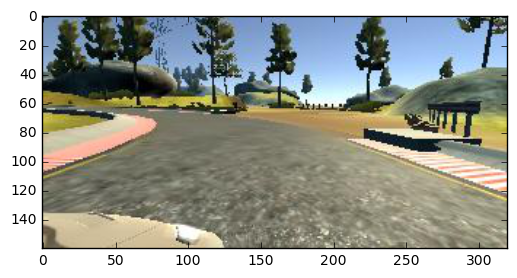

In [15]:
img=plt.imread('right_2016_12_17_22_46_00_964.jpg')
steering=-0.1366656
plt.imshow(img)

In [16]:
def random_crop(image,steering=0.0,tx_lower=-20,tx_upper=20,ty_lower=-2,ty_upper=2,rand=True):
    # we will randomly crop subsections of the image and use them as our data set.
    # also the input to the network will need to be cropped, but of course not randomly and centered.
    shape = image.shape
    col_start,col_end =abs(tx_lower),shape[1]-tx_upper
    horizon=60;
    bonnet=136
    if rand:
        tx= np.random.randint(tx_lower,tx_upper+1)
        ty= np.random.randint(ty_lower,ty_upper+1)
    else:
        tx,ty=0,0
    
    #    print('tx = ',tx,'ty = ',ty)
    random_crop = image[horizon+ty:bonnet+ty,col_start+tx:col_end+tx,:]
    image = cv2.resize(random_crop,(64,64),cv2.INTER_AREA)
    # the steering variable needs to be updated to counteract the shift 
    if tx_lower != tx_upper:
        dsteering = -tx/(tx_upper-tx_lower)/3.0
    else:
        dsteering = 0
    steering += dsteering
    
    return image,steering

def random_shear(image,steering,shear_range):
    rows,cols,ch = image.shape
    dx = np.random.randint(-shear_range,shear_range+1)
    #    print('dx',dx)
    random_point = [cols/2+dx,rows/2]
    pts1 = np.float32([[0,rows],[cols,rows],[cols/2,rows/2]])
    pts2 = np.float32([[0,rows],[cols,rows],random_point])
    dsteering = dx/(rows/2) * 360/(2*np.pi*25.0) / 6.0    
    M = cv2.getAffineTransform(pts1,pts2)
    image = cv2.warpAffine(image,M,(cols,rows),borderMode=1)
    steering +=dsteering
    
    return image,steering

def random_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = 0.8 + 0.4*(2*np.random.uniform()-1.0)    
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def random_flip(image,steering):
    coin=np.random.randint(0,2)
    if coin==0:
        image,steering=cv2.flip(image,1),-steering
    return image,steering

(-0.1366656, -0.3228768834175175)

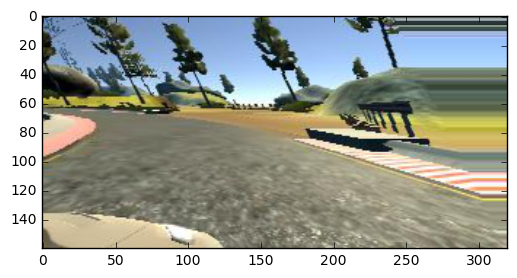

In [17]:
img_shear,steering_shear=random_shear(img,steering,100)
plt.figure()
plt.imshow(img_shear)
plt.imsave('img_shear.jpg',img_shear)
steering,steering_shear

(-0.3228768834175175, -0.4228768834175175)

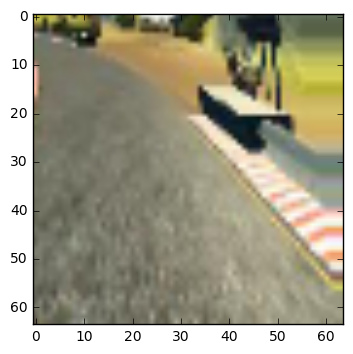

In [18]:
img_crop,steering_crop=random_crop(img_shear,steering_shear,tx_lower=-20,tx_upper=20,ty_lower=-10,ty_upper=10,rand=True)
plt.figure()
plt.imshow(img_crop)
plt.imsave('img_crop.jpg',img_crop)
steering_shear, steering_crop

(-0.4228768834175175, 0.4228768834175175)

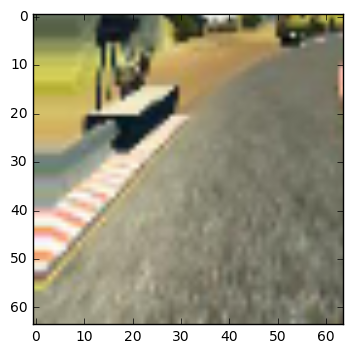

In [19]:
img_flip,steering_flip = random_flip(img_crop,steering_crop)
plt.figure()
plt.imshow(img_flip)
plt.imsave('img_flip.jpg',img_flip)
steering_crop,steering_flip

0.4228768834175175

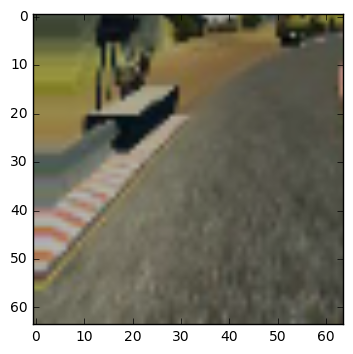

In [22]:
img_bright=random_brightness(img_flip)
plt.figure()
plt.imshow(img_bright)
plt.imsave('img_bright.jpg',img_bright)
steering_flip

In [21]:
[25*x for x in [steering,steering_shear,steering_crop,steering_flip]]

[-3.41664, -8.071922085437938, -10.571922085437938, 10.571922085437938]